In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(url)

In [3]:
filmes.columns = ['filme_id','titulo','genero']
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


 - Criando um novo DataFrame 

In [4]:
generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_dos_filmes = pd.concat([filmes, generos], axis = 1)

In [6]:
dados_dos_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


 - Reescalando os dados.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

In [8]:
from sklearn.cluster import KMeans

In [9]:
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados)

print(' Grupos {}'.format(modelo.labels_))

 Grupos [0 0 1 ... 1 0 1]


In [10]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.56514627  1.54462538  1.55824093  1.35876364 -0.02580865
  -0.3022129  -0.21009817 -0.61934748  1.12559449 -0.09492563 -0.24211921
   0.59462028  0.25022805 -0.15213055 -0.28711701  0.55602536 -0.4214459
  -0.16643393 -0.0670271 ]
 [ 0.03442795 -0.28639828 -0.26946056 -0.24193751 -0.18991916  0.23164667
  -0.16606939  0.12339714  0.13744243 -0.17927854 -0.08974809 -0.14928012
  -0.11040157  0.01324324 -0.21479227  0.1781008  -0.23619334 -0.48715628
   0.07737281  0.03680138]
 [-0.05917995  0.45067605 -0.15484179 -0.23697141 -0.26348986 -0.61100139
   0.6213179  -0.21326539 -0.01732375 -0.15897943  0.2966871   0.54162174
  -0.04159076 -0.1787773   0.66716303 -0.31702164  0.32026918  1.55681558
  

In [11]:
grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)
grupos = grupos.T

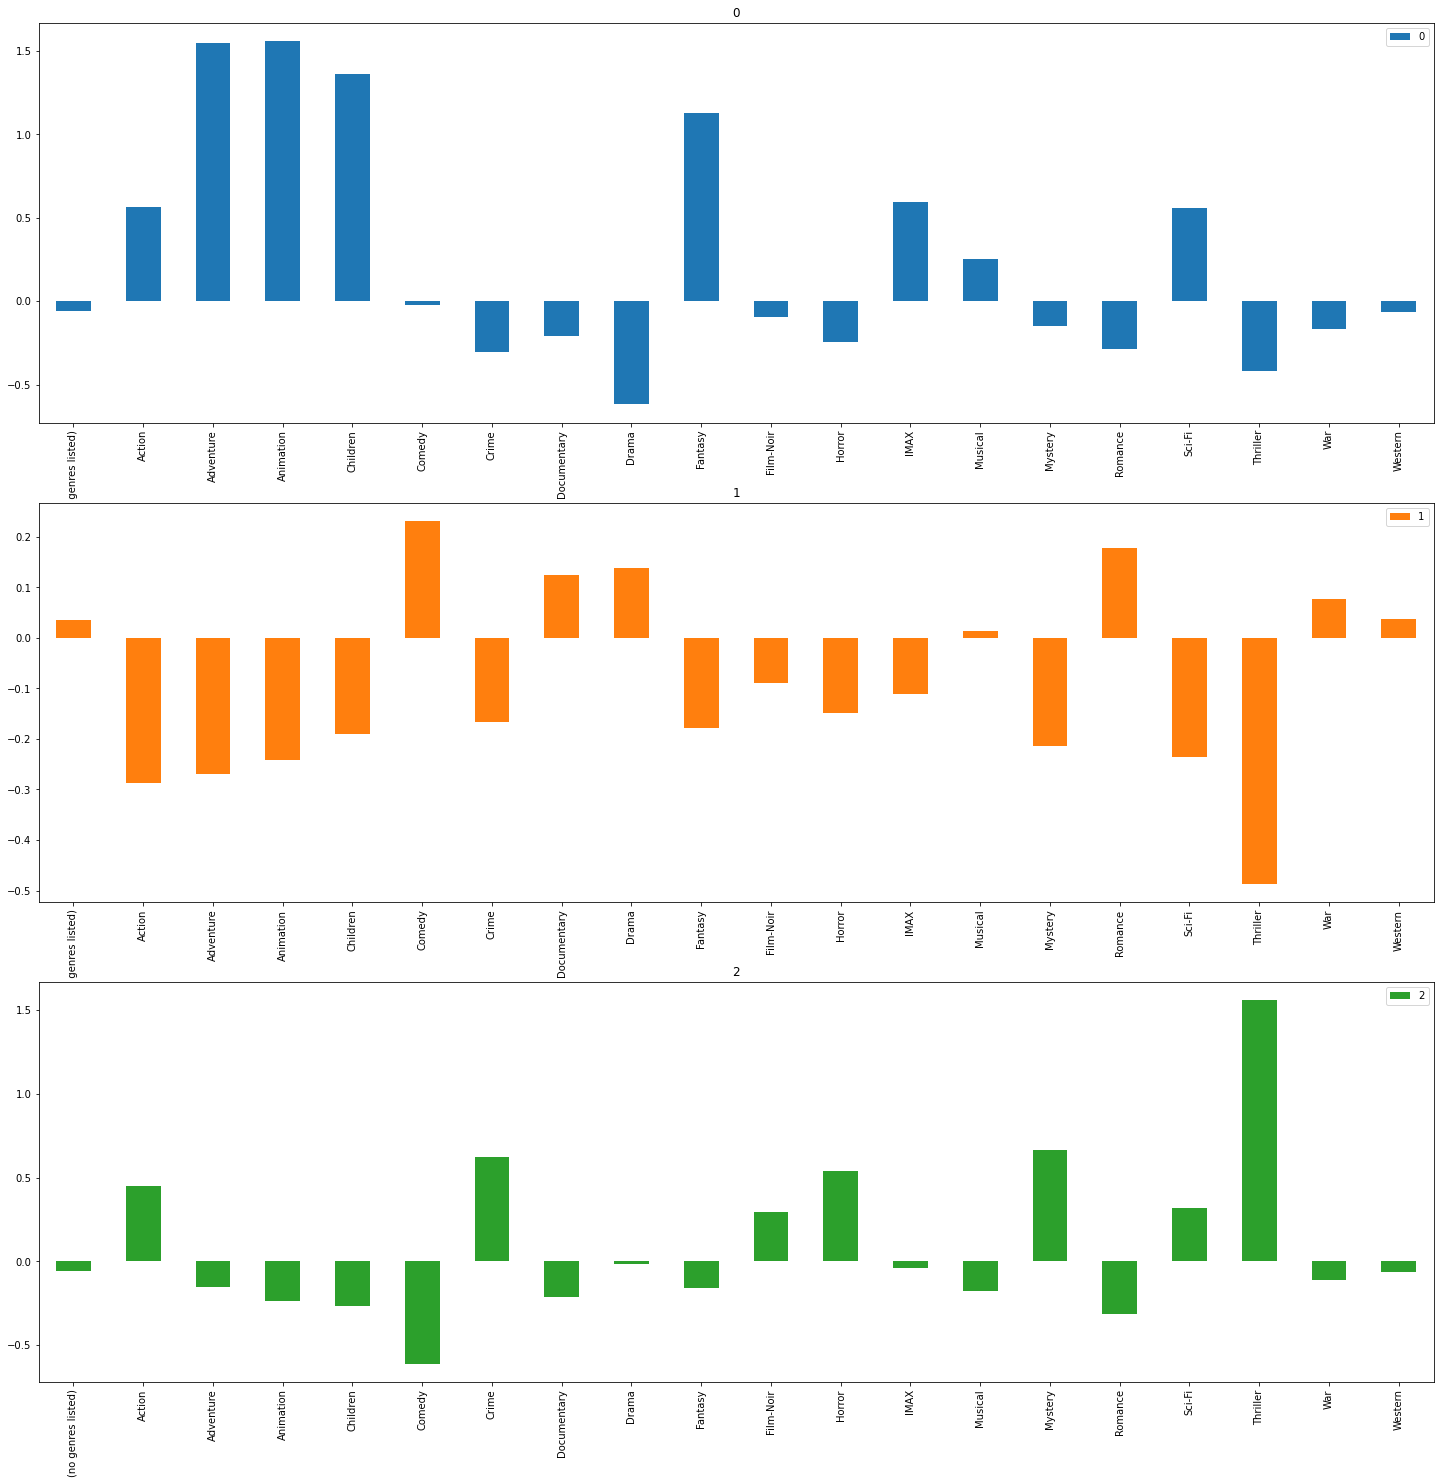

In [12]:
grupos.plot.bar(subplots = True,
              figsize = (25,25),
              sharex=False)
plt.show()

 - Criando um filtro e verificando se a agrupação do KMeans fez sentido .

In [13]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
534,631,All Dogs Go to Heaven 2 (1996),Adventure|Animation|Children|Fantasy|Musical|R...,0,0,1,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1814,2414,Young Sherlock Holmes (1985),Action|Adventure|Children|Fantasy|Mystery|Thri...,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8522,114627,Angel's Egg (Tenshi no tamago) (1985),Animation|Drama|Fantasy,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7426,80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8781,129229,Northmen - A Viking Saga (2014),Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7953,96007,Dragon Ball GT: A Hero's Legacy (Doragon bôru ...,Action|Adventure|Animation,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9394,164226,Maximum Ride (2016),Action|Adventure|Comedy|Fantasy|Sci-Fi|Thriller,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
5787,31553,Double Dragon (1994),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5236,8580,Into the Woods (1991),Adventure|Comedy|Fantasy|Musical,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
9535,172547,Despicable Me 3 (2017),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


 - Utilizando um algoritmo pra reduzir o número de dimensões e facilitar a visualização.

In [14]:
from sklearn.manifold import TSNE

In [15]:
tsne = TSNE()

In [16]:
visualizacao =  tsne.fit_transform(generos_escalados)
visualizacao

array([[-46.604847 , -23.137693 ],
       [ 30.89373  , -13.005246 ],
       [ -6.210785 ,  19.533215 ],
       ...,
       [  7.4435105, -18.262756 ],
       [ 15.945373 ,  23.964132 ],
       [-30.025349 ,  -1.5781586]], dtype=float32)

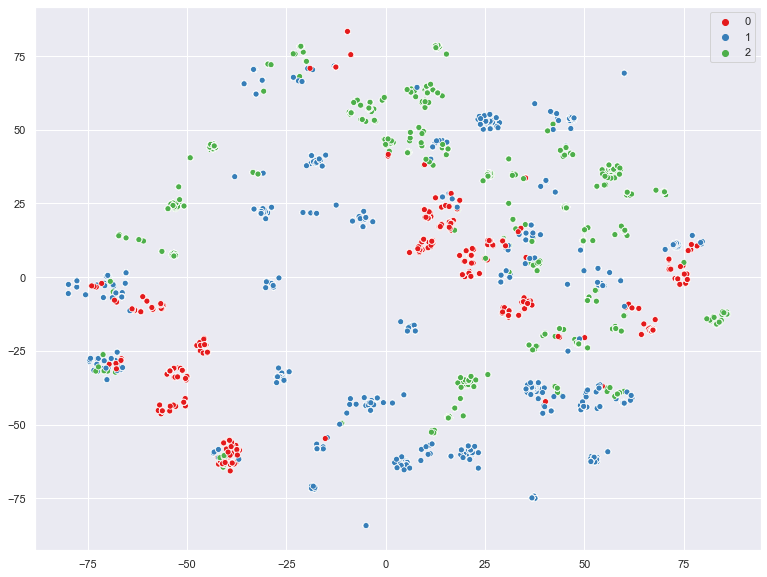

In [17]:
# plt.figure(figsize = (13,10))
sns.set(rc={'figure.figsize':(13,10)})

sns.scatterplot(x = visualizacao[:, 0],
               y = visualizacao[:, 1],
               hue =modelo.labels_,
               palette = sns.color_palette('Set1',3))

 - Aumentando a quantidade de grupos.

In [18]:
modelo = KMeans(n_clusters = 20)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                     columns = generos.columns)


grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,-0.181476,1.135130,3.865793,3.697524,0.272641,-0.296867,-0.217489,-0.731436,0.795091,-0.094926,-0.321911,-0.128397,0.834511,-0.203451,-0.215837,-0.103900,-0.491259,-0.164414,-0.132065
1,-0.05918,-0.368077,-0.276630,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,1.110807,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,0.211123,-0.334435,-0.491259,-0.202020,-0.132065
2,-0.05918,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065
3,-0.05918,-0.462136,-0.364480,-0.238850,-0.260913,-0.604451,-0.338046,4.597924,-0.808396,-0.285947,-0.094926,-0.318057,-0.128397,-0.188419,-0.229553,-0.429644,-0.334435,-0.479111,-0.078173,-0.132065
4,-0.05918,-0.275311,-0.251493,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.314329,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.463933,-0.202020,-0.132065


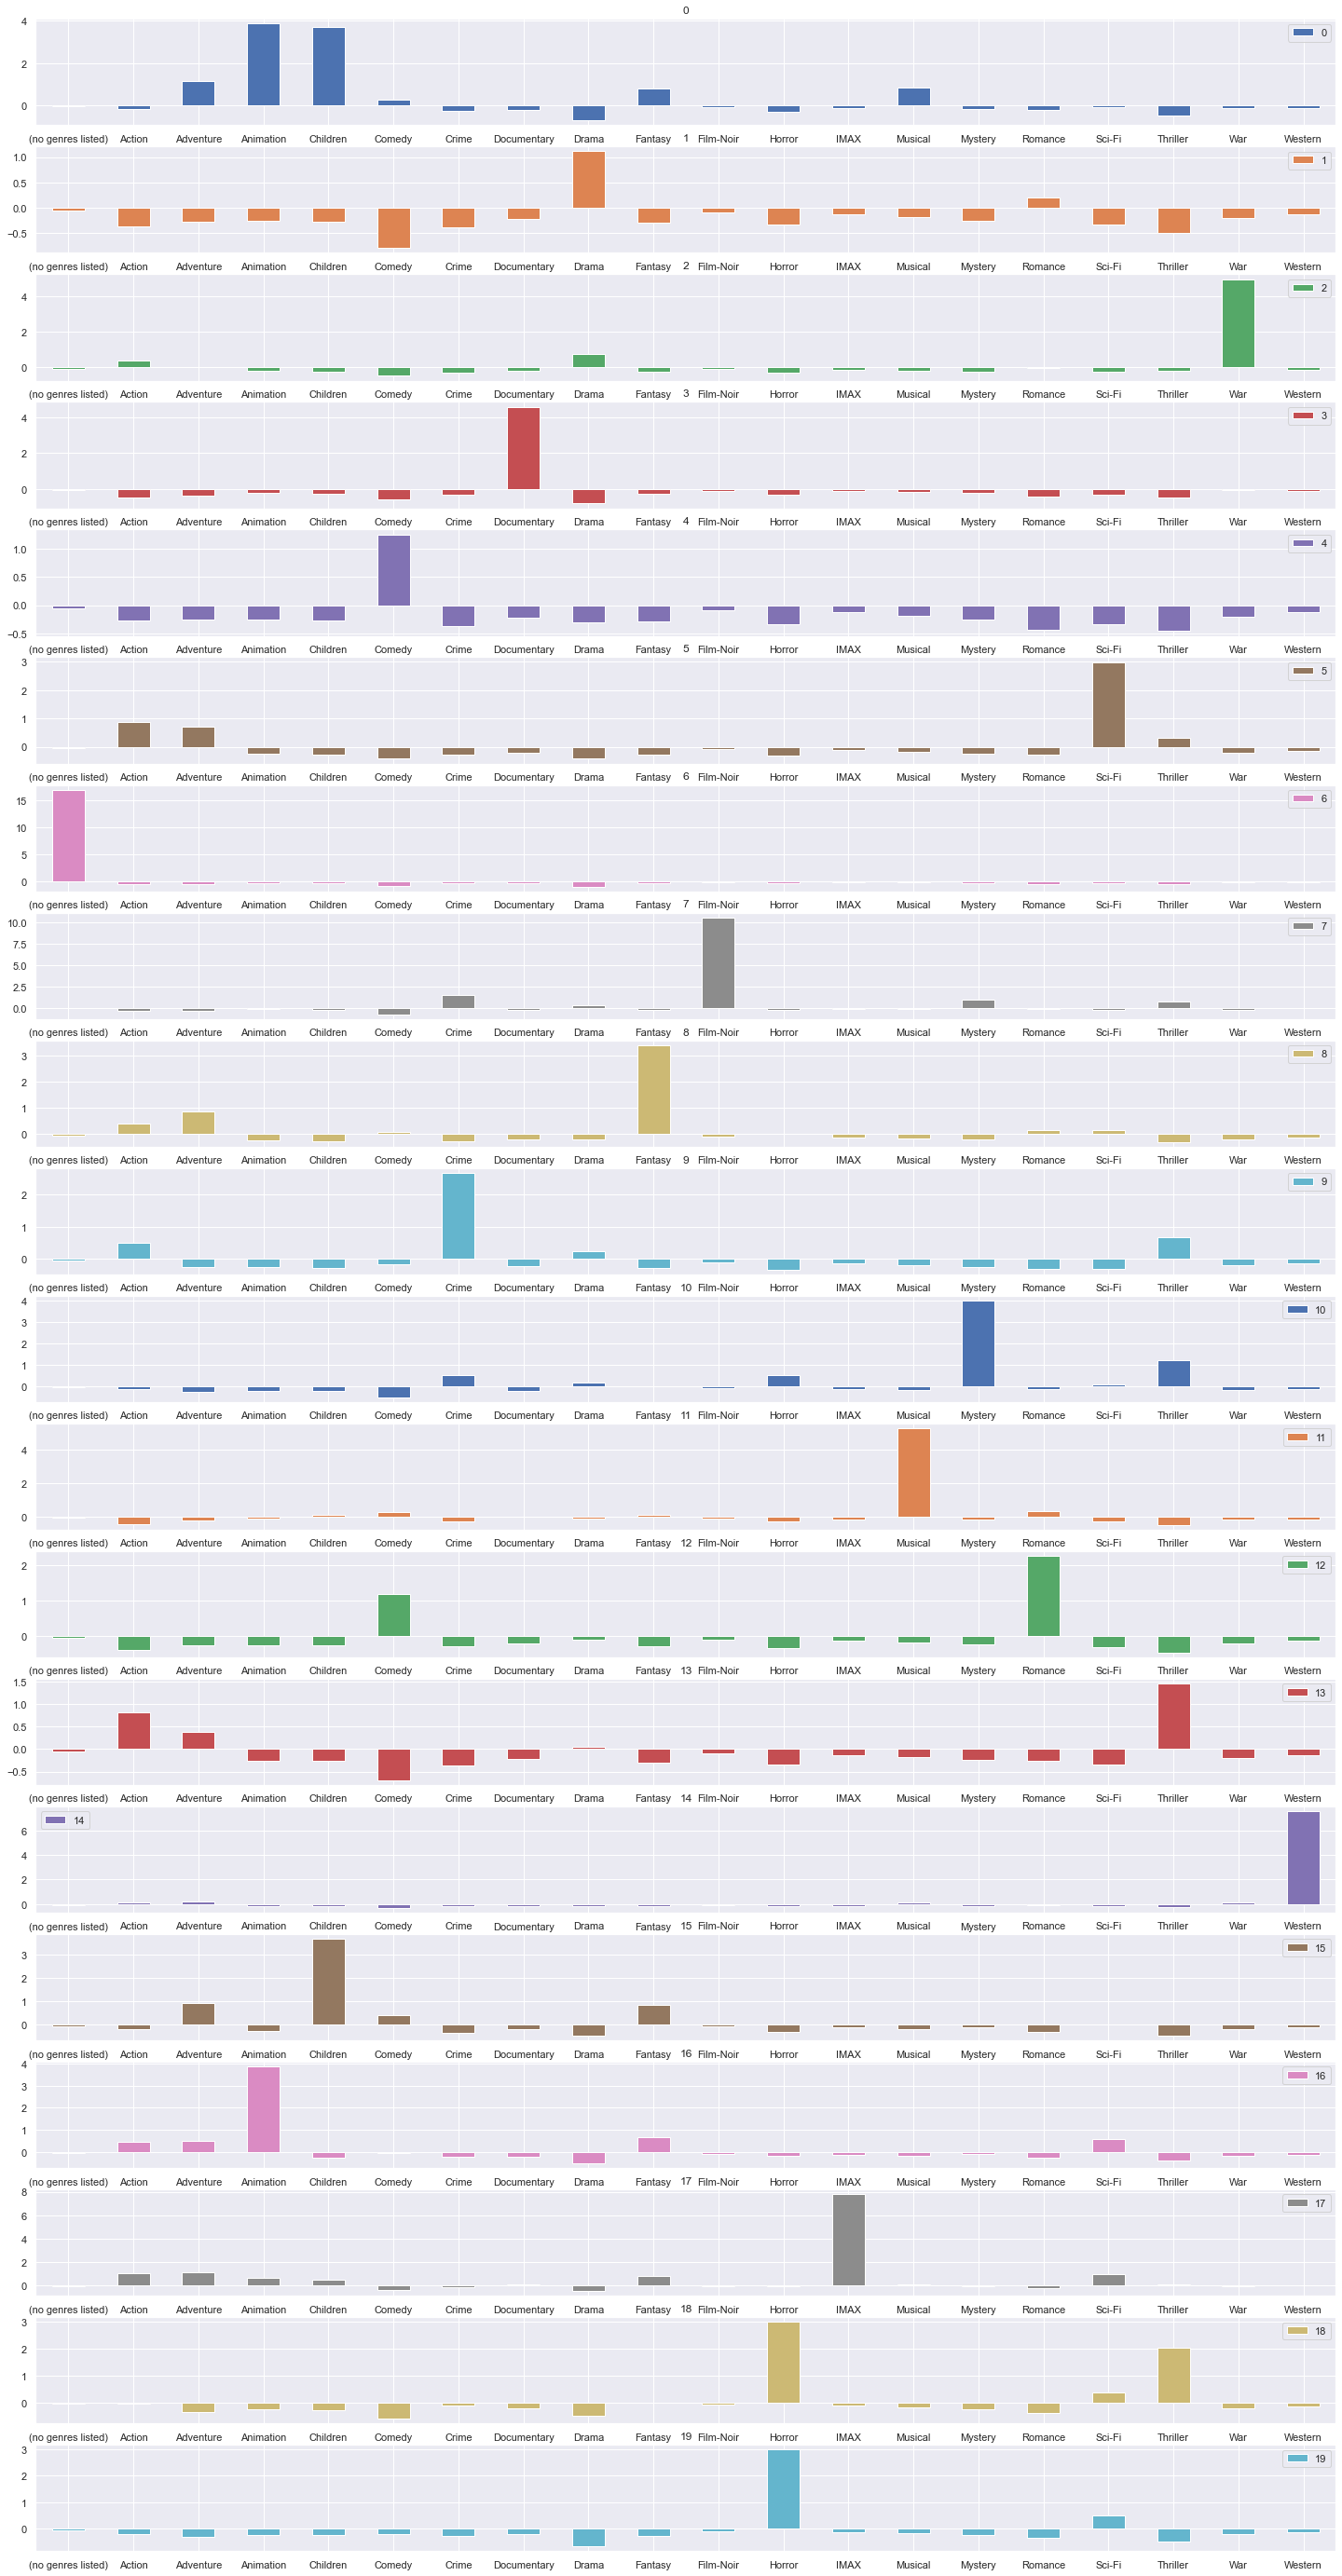

In [19]:
grupos.T.plot.bar(subplots = True,
              figsize = (25,50),
              sharex=False,
              rot = 0)
plt.show()

 - Criando um filtro e verificando se a agrupação do KMeans fez sentido .

In [20]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6909,64034,"Boy in the Striped Pajamas, The (Boy in the St...",Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4708,7025,"Midnight Clear, A (1992)",Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3466,4727,Captain Corelli's Mandolin (2001),Drama|Romance|War,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2121,2818,Iron Eagle IV (1995),Action|War,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2849,3811,Breaker Morant (1980),Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5775,31410,"Downfall (Untergang, Der) (2004)",Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5209,8493,Memphis Belle (1990),Action|Drama|War,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8323,107408,Only Old Men Are Going to Battle (V boy idut o...,Comedy|Drama|War,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7341,78103,Shake Hands with the Devil (2007),Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
97,110,Braveheart (1995),Action|Drama|War,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# sns.set(rc={'figure.figsize':(13,10)})

# sns.scatterplot(x = visualizacao[:, 0],
#                y = visualizacao[:, 1],
#                hue =modelo.labels_,
#                palette = sns.color_palette('Set1',20))

 - Tentando achar o melhor numero de clusters.

In [22]:
# Criando uma função para calcular o erro de acordo com o número de clusters.

def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters = numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [24]:
kmeans(10, generos_escalados)

[10, 103413.1462786359]

In [26]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

In [27]:
resultado = pd.DataFrame( resultado,
            columns=['grupos','inertia'])

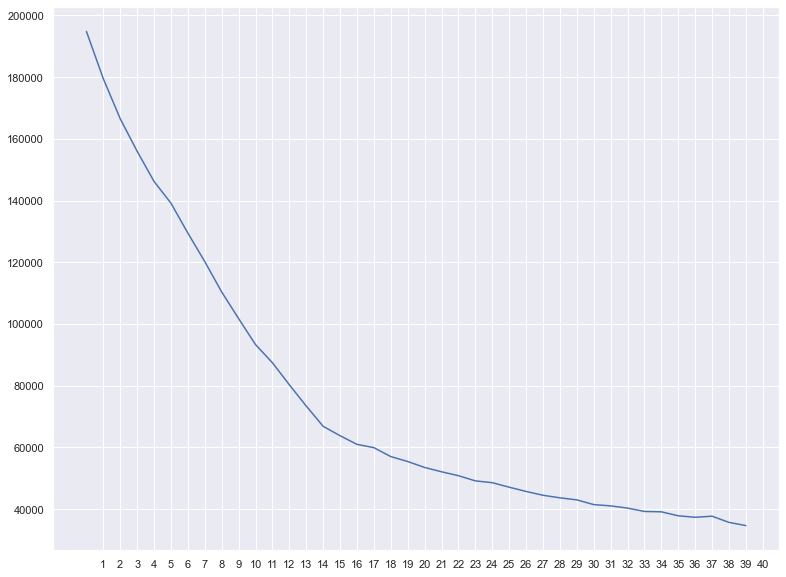

In [28]:
resultado.inertia.plot(xticks=resultado.grupos)

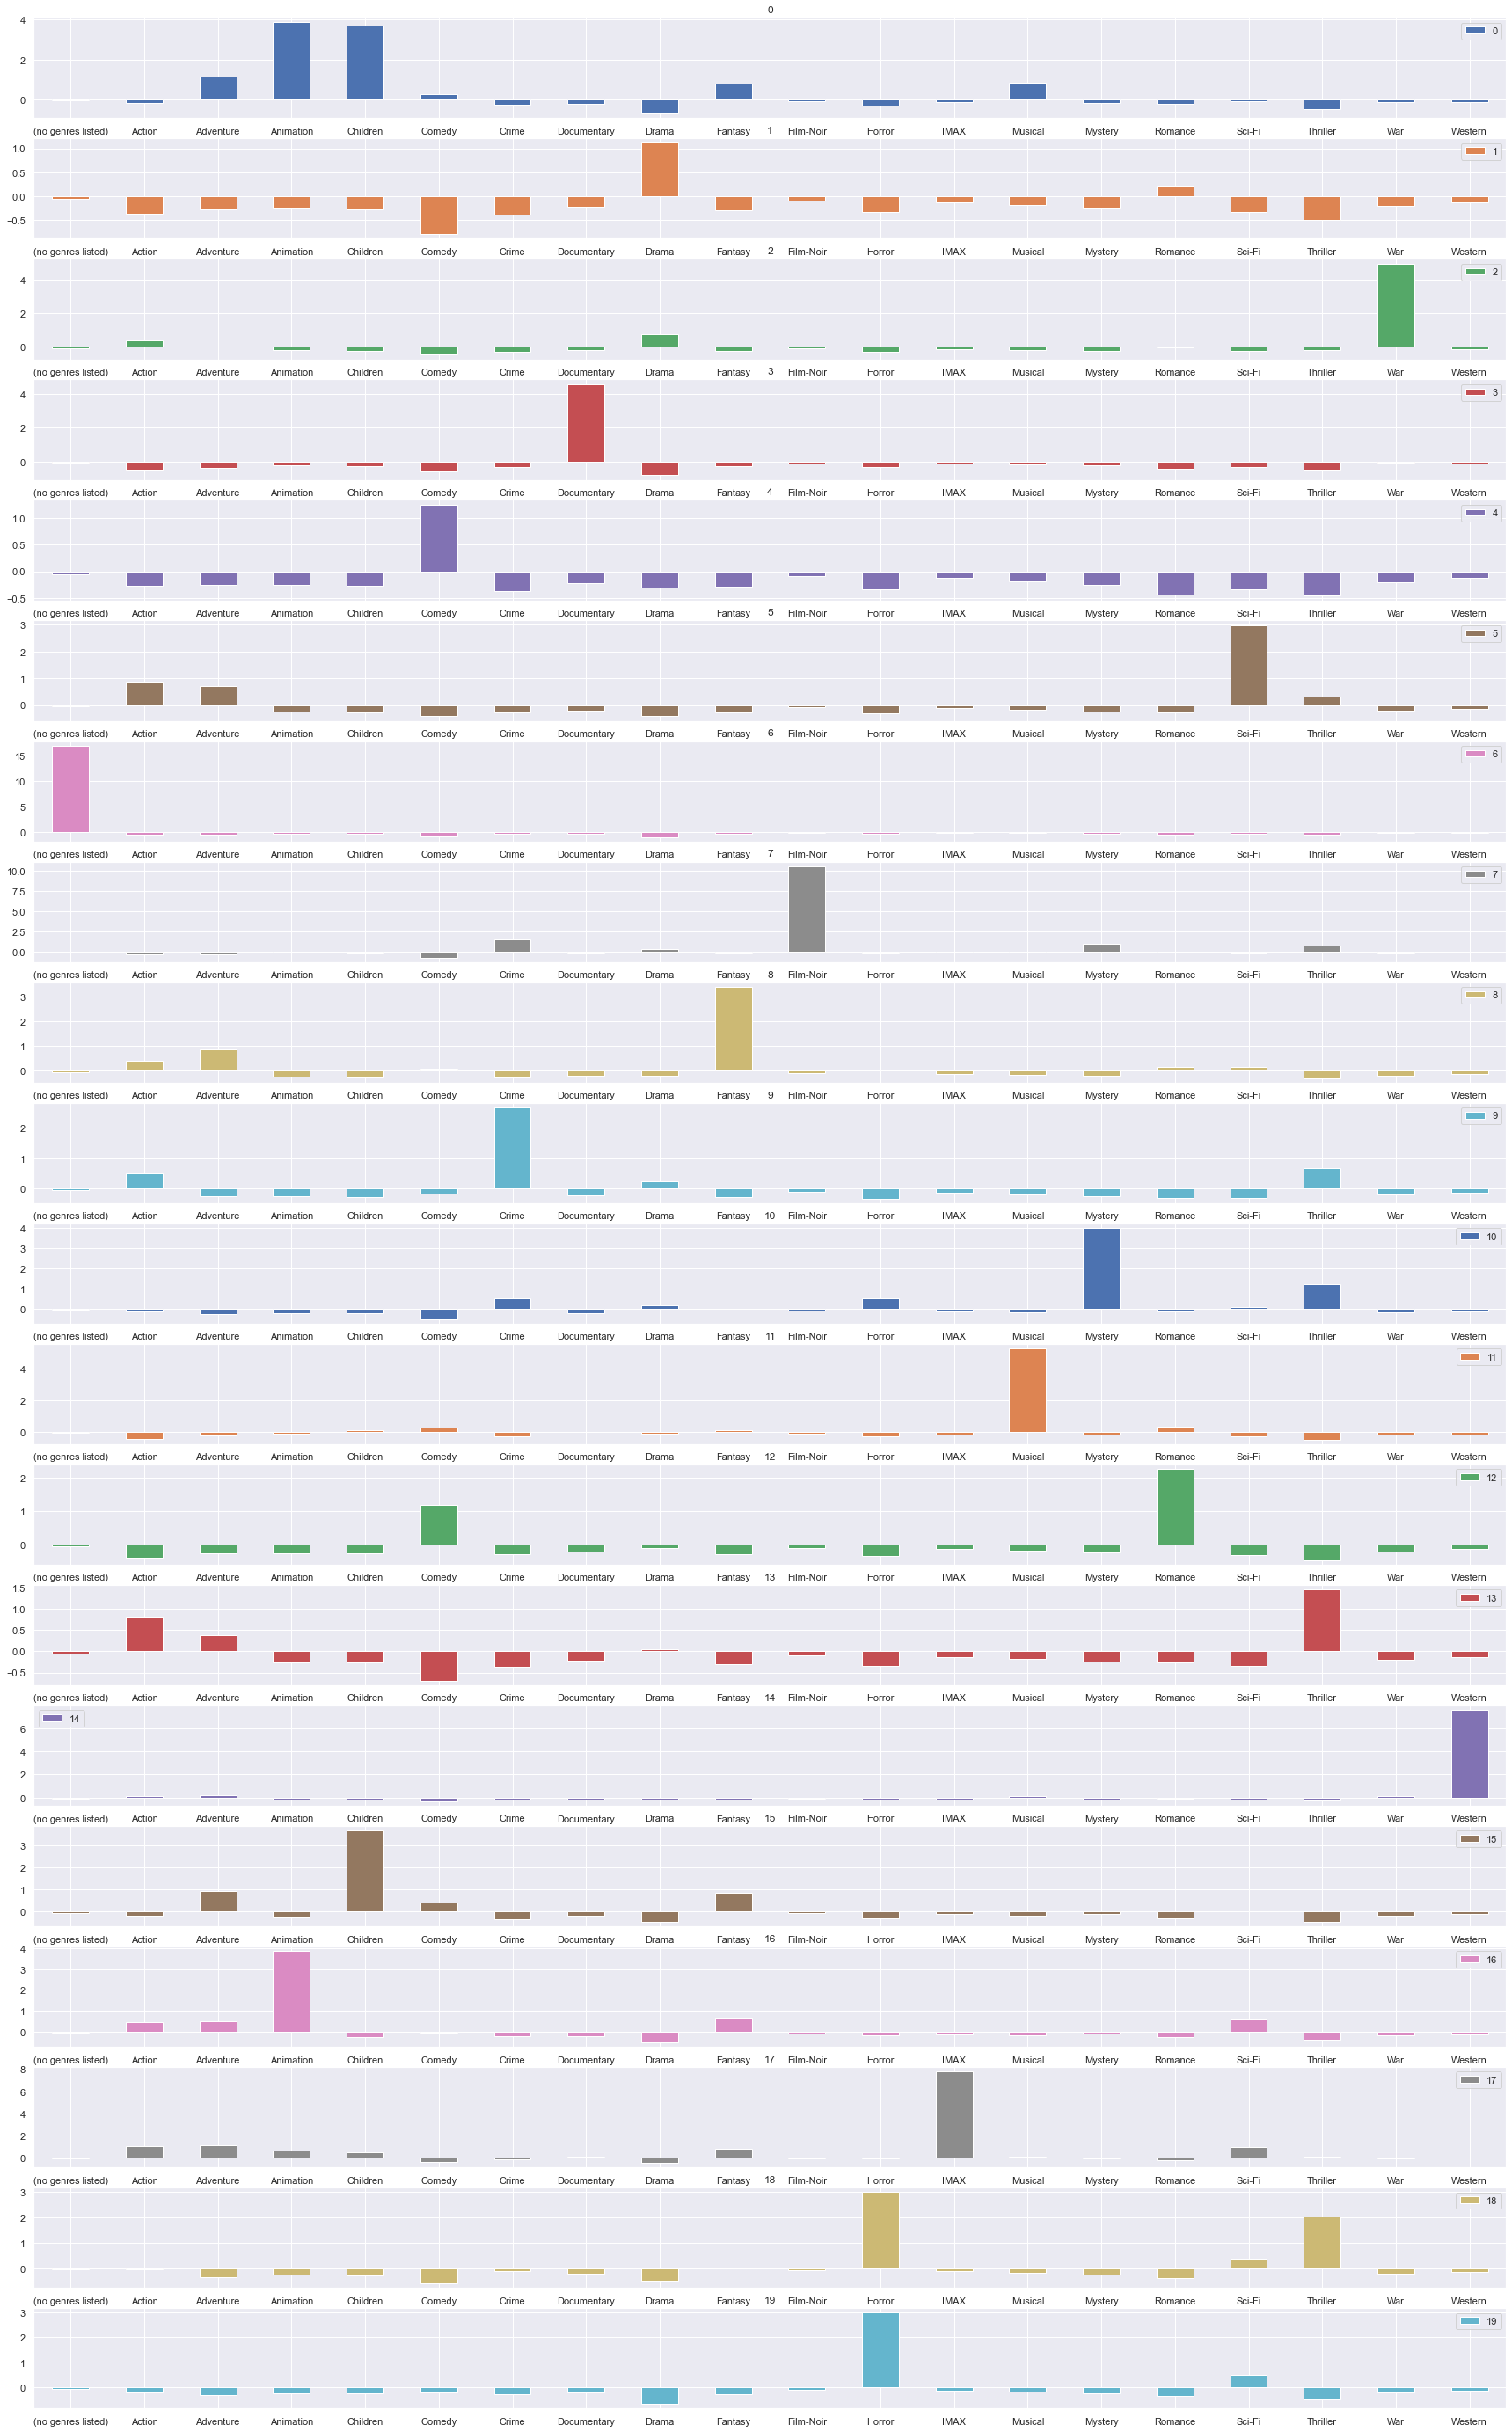

In [29]:
modelo = KMeans(n_clusters = 17)
modelo.fit(generos_escalados)
grupos.T.plot.bar(subplots = True,
              figsize = (30,50),
              sharex=False,
              rot = 0)
plt.show()

In [46]:
grupo = 16
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
912,1211,"Wings of Desire (Himmel über Berlin, Der) (1987)",Drama|Fantasy|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4571,6790,Avalon (2001),Drama|Fantasy|Sci-Fi,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5613,27036,Merlin (1998),Action|Adventure|Drama|Fantasy|Romance,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4030,5700,The Pumaman (1980),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5621,27156,Neon Genesis Evangelion: The End of Evangelion...,Action|Animation|Drama|Fantasy|Sci-Fi,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7188,72407,"Twilight Saga: New Moon, The (2009)",Drama|Fantasy|Horror|Romance|Thriller,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
6397,50796,Blood and Chocolate (2007),Drama|Fantasy|Horror|Romance,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6675,57640,Hellboy II: The Golden Army (2008),Action|Adventure|Fantasy|Sci-Fi,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8440,111785,Midnight Chronicles (2009),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,71129,Green Lantern: First Flight (2009),Action|Adventure|Animation|Fantasy|Sci-Fi,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
